# 1. Get some cutouts

In [1]:
from time import time
t0 = time()

In [2]:
from lensedquasarsutilities.model_PSF_from_field import download_and_extract, estimate_psf_from_extracted_h5
from lensedquasarsutilities.formatting import get_J2000_name


ra, dec = 21.3174, -10.2082
name = get_J2000_name(ra, dec)
workdir = f'/tmp/{name}'

savepath_fits, savepath_cutouts_h5 = download_and_extract(ra, dec, workdir, survey='panstarrs',
                                                          mag_estimate=18.5)
savepath_fits, savepath_cutouts_h5

1.10.1


(PosixPath('/tmp/J0125-1012/cutouts_panstarrs_J0125-1012.fits'),
 PosixPath('/tmp/J0125-1012/cutouts_panstarrs_J0125-1012_cutouts.h5'))

The above 
- queried Gaia to know what field size is necessary to have at least one star that can be used to model the PSF in the field. If our lensed quasar isn't in Gaia, then we need to provide a mag_estimate of the lensed images, so we can know what type of stars to look for.
- downloaded all the files available in the specified survey in a fits file.
- extracted cutouts of the stars that can be used for PSF, and of the lens, preserving the WCS information.

# 2. Get a pixelated PSF model with STARRED

In [3]:
estimate_psf_from_extracted_h5(savepath_cutouts_h5)

/home/fred/Documents/starred/starred/psf/loss.py:124: UserWarning: lambda is not normalized. Provide the weight map !
  warnings.warn('lambda is not normalized. Provide the weight map !')
optax.adabelief: 100%|████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:01<00:00, 1416.96it/s]
/home/fred/Documents/starred/starred/psf/loss.py:124: UserWarning: lambda is not normalized. Provide the weight map !
  warnings.warn('lambda is not normalized. Provide the weight map !')
optax.adabelief: 100%|████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:00<00:00, 1529.59it/s]
/home/fred/Documents/starred/starred/psf/loss.py:124: UserWarning: lambda is not normalized. Provide the weight map !
  warnings.warn('lambda is not normalized. Provide the weight map !')
optax.adabelief: 100%|████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:00<00:00, 1557.98it/s]
/home/fred/Do

The above added the narrow PSF to the hdf5 file already containing the cutouts. We can use it to model the lensed quasar.

# 3. Model the lensed quasar

In [4]:
from lensedquasarsutilities.image_fitting_blind import prepare_model_from_h5
model = prepare_model_from_h5(savepath_cutouts_h5)

In [5]:
model.sample_no_galaxy(num_warmup=1000, num_samples=1000)

sample: 100%|██████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 634.30it/s, step size 2.37e-01. acc. prob=0.32]



                  mean       std    median      5.0%     95.0%     n_eff     r_hat
  A1_g.00000     36.68      0.28     36.69     36.18     37.09      4.01      1.65
  A1_i.00000    127.64      2.39    127.34    124.53    131.04      2.78      2.44
  A1_r.00000     63.89      0.30     63.89     63.41     64.39     10.55      1.01
  A1_z.00000     43.67      0.33     43.70     43.11     44.11     29.72      1.02
  A2_g.00000     12.31      0.25     12.33     11.88     12.60      2.91      2.39
  A2_i.00000     49.06      1.57     49.06     46.27     51.14      4.34      1.74
  A2_r.00000     20.61      0.32     20.63     20.11     21.15     18.46      1.02
  A2_z.00000     15.14      0.45     15.16     14.40     15.87     55.39      1.00
  dx_i.00000     -0.10      0.04     -0.09     -0.17     -0.05      5.16      1.47
  dx_r.00000      0.02      0.01      0.02     -0.00      0.04     17.78      1.12
  dx_z.00000      0.06      0.03      0.05      0.02      0.10     16.02      1.07
  d

In [6]:
print(f"It took us {time() - t0:.01f} seconds to download, model the PSF, and fit this object.")

It took us 24.6 seconds to download, model the PSF, and fit this object.


Used median params from sampling


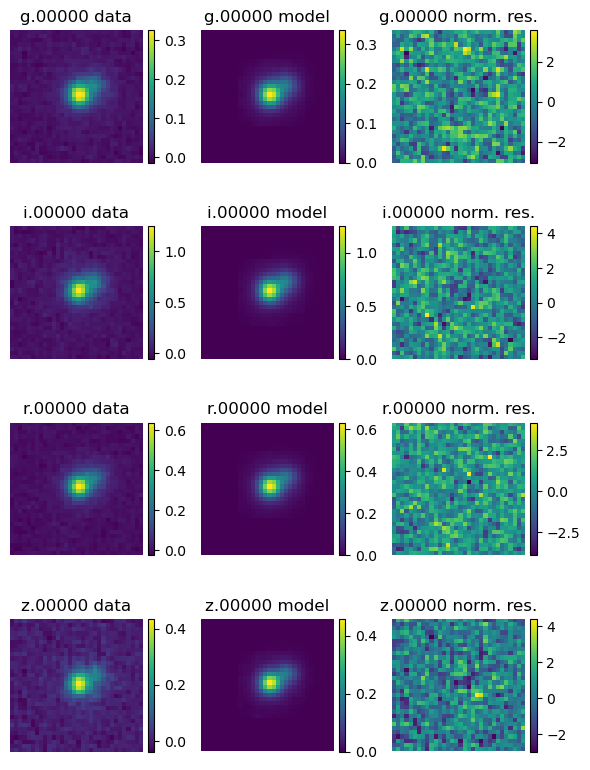

In [7]:
model.plot_model_no_galaxy()